# MCB288 Lecture 1 : histograms, scatter, and correlation

Run this cell to import the various packages that we will be using today:

In [78]:
import numpy as np  # numerical python lib
import pandas as pd  # tabular data analysis

import matplotlib.pyplot as plt  # plotting
plt.style.use('fivethirtyeight') # set plot style
%matplotlib inline

import seaborn as sns  # nicer plotting
sns.set_style('whitegrid')  # set plot style

import statsmodels.formula.api as smf  # basic statistical modeling

import random # generate random numbers

##  pandas and DataFrames 

You may be familiar with the spreadsheet software Excel, or even DataFrames in the R programming language. For tabular data, the most commonly used data analysis package in Python is called pandas. What we call tables or spreadsheets, pandas calls DataFrames. 

You'll often see a generic "DataFrame" abbreviated as df in code examples. 

pandas (imported above as "pd") has methods for reading tab or comma separated files into data frames. (These kinds of tab-delimited or comma separated values (csv) files can be exported from Excel.)

Here we'll input a dataset of family heights.

In [7]:
family_heights = pd.read_csv('galton-stata11.tab', sep='\t')
family_heights.head()

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1.0,0.0
1,1,78.5,67.0,F,69.2,4,0.0,1.0
2,1,78.5,67.0,F,69.0,4,0.0,1.0
3,1,78.5,67.0,F,69.0,4,0.0,1.0
4,2,75.5,66.5,M,73.5,4,1.0,0.0


(Note: this was true for the original source, but now the data is changed. 
Now we have to undo some bad biology: the statistics text that provided this data scaled all female heights by 1.08 to make the male and female distributions similar for pedagogical purposes. We don't want that.  For simplicity, lets only use sons, too.  We call this fhs.)

In [11]:
# add a new column, the "mid-parent" = average of mother and father
fhs=family_heights
# introducing a new label automatically adds a new column
fhs['midparentHeight']=(fhs['father'] + fhs['mother'])/2

In [12]:
fhs.head()

,family,father,mother,gender,height,kids,male,female,midparentHeight
0,1,78.5,67.0,M,73.2,4,1.0,0.0,72.75
1,1,78.5,67.0,F,69.2,4,0.0,1.0,72.75
2,1,78.5,67.0,F,69.0,4,0.0,1.0,72.75
3,1,78.5,67.0,F,69.0,4,0.0,1.0,72.75
4,2,75.5,66.5,M,73.5,4,1.0,0.0,71.00


Lets look at some attributes of the family_heights data frame

In [13]:
# hint: use xxx.[tab] to see options for object xxx
family_heights.count()

family             898
father             898
mother             898
gender             898
height             898
kids               898
male               898
female             898
midparentHeight    898
dtype: int64

In [14]:
family_heights.shape

(898, 9)

In [15]:
print('Number of rows: ' + str(family_heights.shape[0]))
print('Number of columns: ' + str(family_heights.shape[1]))

Number of rows: 898
Number of columns: 9


In [16]:
family_heights.columns

Index(['family', 'father', 'mother', 'gender', 'height', 'kids', 'male',
       'female', 'midparentHeight'],
      dtype='object')

In [17]:
family_heights.columns[0]

'family'

for simplicity lets consider sons.  (there are 465, lets check)

this is how you sub-select based on the values of a column.  Remember to use "==" instead of "=".  Can also use other comparisons (less than, less than or equal to, etc etc etc.)

In [27]:
fhs[fhs['male']==1.0].shape

(465, 9)

In [29]:
sons = fhs[fhs['male']==1.0]
sons.head()

,family,father,mother,gender,height,kids,male,female,midparentHeight
0,1,78.5,67.0,M,73.2,4,1.0,0.0,72.75
4,2,75.5,66.5,M,73.5,4,1.0,0.0,71.00
5,2,75.5,66.5,M,72.5,4,1.0,0.0,71.00
8,3,75.0,64.0,M,71.0,2,1.0,0.0,69.50
10,4,75.0,64.0,M,70.5,5,1.0,0.0,69.50


(481,)

## Histograms

Histograms (frequency distributions) are a built-in property of data frames!  Great for visualizing your datasets, getting a sense of central tenency (mean), variability, and outliers. (Use bins=num to set the number of bins, or use the default.)

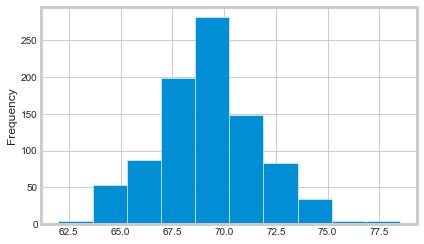

In [30]:
fhs['father'].plot.hist()

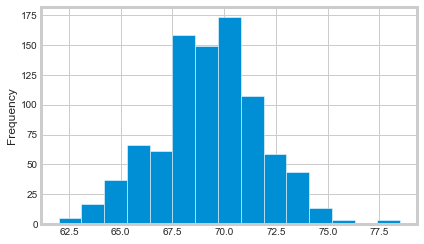

In [31]:
fhs['father'].plot.hist(bins=15)

In [32]:
fhs['father'].mean()

69.23285077950997

In [33]:
fhs["mother"].mean()

64.08440979955456

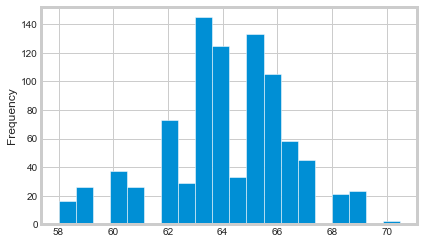

In [34]:
fhs['mother'].plot.hist(20)

## are maternal and paternal height distributions different?

## are paternal and son height distributions different?

3.58291846997281

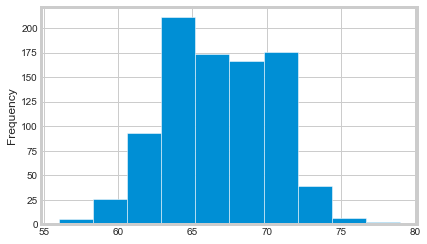

In [36]:
fhs["height"].plot.hist()
fhs["height"].std()

## Why are so many quantities "normally" distributed?

If we have a quantity that is produced by the sum of small contributions from many underlying variables (e.g., small positive or negative contributions from different alleles at many loci) then the result will be normally distributed

In [37]:
my_nums = []
for i in range(0,500):
    y=0
    for j in range(0,1000):
        y = y + 0.05*random.randrange(-1,2,2)
    # print(y)
    my_nums.append(y)
df = pd.DataFrame({'entries': my_nums})

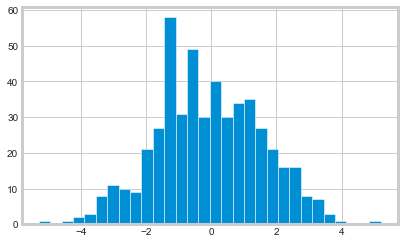

In [38]:
df['entries'].hist(bins=30)

## Quantifying correlation

Subsetting

Sometimes we also might not care about some of the columns. Keeping them around can often be detrimental to the performance of Python, especially on very large datasets. Luckily, we can either choose the columns we want using df[lst], where lst is a list of columns we want to keep:

In [39]:
parental_heights = fhs[['father','mother']]
parental_heights.head()

,father,mother
0,78.5,67.0
1,78.5,67.0
2,78.5,67.0
3,78.5,67.0
4,75.5,66.5


In [40]:
parental_heights.cov()

,father,mother
father,6.102164,0.419810
mother,0.419810,5.322365


In [41]:
parental_heights.corr()

,father,mother
father,1.000000,0.073665
mother,0.073665,1.000000


Are these correlations between mother and father 'significant'?  We will consider this next week. 

For now, note that the correlation is always between -1 (perfect anti-correlation) and +1 (perfect correlation).  If r = 0, there is no correlation.

In [42]:
fhs.corr()

,father,mother,height,kids,male,female,midparentHeight
father,1.000000,0.073665,0.275355,-0.160023,-0.027148,0.027148,0.753908
mother,0.073665,1.000000,0.201655,-0.020030,-0.035617,0.035617,0.710731
height,0.275355,0.201655,1.000000,-0.126910,0.714258,-0.714258,0.327074
kids,-0.160023,-0.020030,-0.126910,1.000000,-0.063257,0.063257,-0.126072
male,-0.027148,-0.035617,0.714258,-0.063257,1.000000,-1.000000,-0.042614
female,0.027148,0.035617,-0.714258,0.063257,-1.000000,1.000000,0.042614
midparentHeight,0.753908,0.710731,0.327074,-0.126072,-0.042614,0.042614,1.000000


## Scatter plots

Let's look at a scatterplot between mother heights and daughter heights now. We can do this by applying the .scatter() function

.scatter() has two required arguments: x and y, which refer to the attributes of the DataFrame that you are plotting against each other. x will correspond to the horizontal axis of the plot, while y will correspond to the vertical axis.

.scatter() also takes in optional arguments s, c, and ax. s is an integer describing the desired size of the points on the plot. c is a string describing the desired color of the points. axl can be used to overlay one scatter plot onto another. We will see an example of an overlay plot later in this notebook.

Let's create a scatter plot using family_average_heights to compare the relationship between 'mother' and 'daughter'. Set the size of the points to 20 and the color to 'blue'.

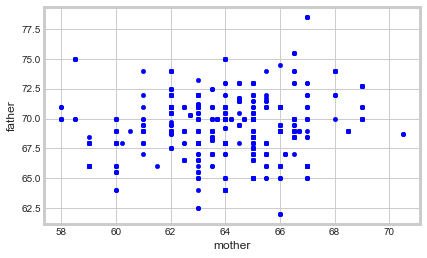

In [43]:
family_heights.plot.scatter(x = 'mother', y = 'father', s = 20, c = 'blue')

## correlation

Correlation and covariance are built-in to pandas.  But it may be useful to see how we can compute them ourselves.  "covariance" works directly with the original variables.  "correlation" first scales the variables to 'standard units' by subtracting the mean and dividing by standard deviation. [Note this is for "Table" objects]

In [44]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

## Visualizing correlations

Lets create some synthetic datasets where we can get an intuitive visual sense of correlation

In [45]:
def r_scatter(r):
    "Generate a scatter plot with a correlation approximately r"
    # create a blank 5x5 figure canvas with plt
    plt.figure(figsize=(5,5))
    # create two sets of 1,000 normally distributed numbers, mean 0 std-dev 1
    x = np.random.normal(0, 1, 1000) 
    z = np.random.normal(0, 1, 1000)
    # create a variable that is dependent on x with correlation coefficient r
    # and add to it random noise to make the total variance of y equal to 1
    y = r*x + (np.sqrt(1-r**2))*z  
    # make scatterplot, with range -4 to 4 on both axes.                              
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

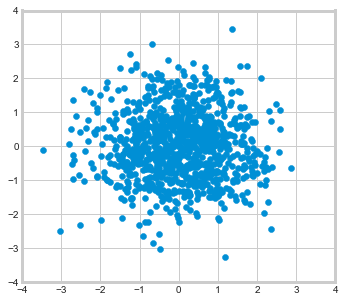

In [46]:
r_scatter(0)

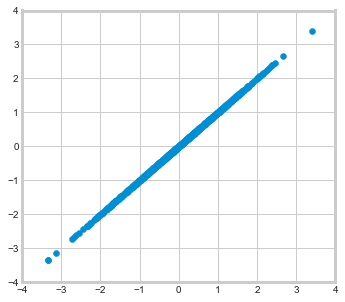

In [47]:
r_scatter(1)

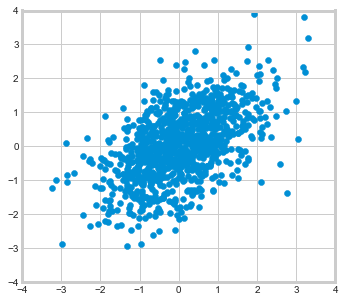

In [48]:
r_scatter(0.5)

In [49]:
x = np.arange(-4, 4.1, 0.5)
# create a pandas dataframe
nonlinear = pd.DataFrame({'x': x, 'y':x**2})
nonlinear.head()

,x,y
0,-4.0,16.00
1,-3.5,12.25
2,-3.0,9.00
3,-2.5,6.25
4,-2.0,4.00


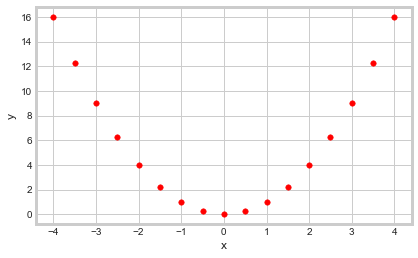

In [50]:
nonlinear.plot.scatter('x', 'y', s=30, color='r')

In [51]:
nonlinear.corr()

,x,y
x,1.0,0.0
y,0.0,1.0


note that even though there is a clear association between x and y, there is no (linear) correlation.

## scatter plots and selecting subsets

In [55]:
#select only two columns
heights = sons[['father','height']]
heights.head()

,father,height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


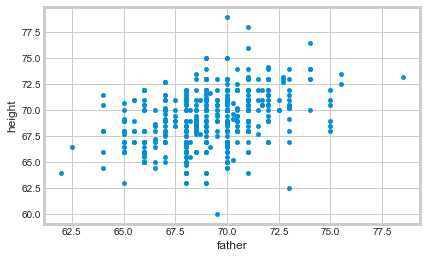

In [56]:
heights.plot.scatter('father', 'height')

In [57]:
heights.corr()

,father,height
father,1.000000,0.391317
height,0.391317,1.000000


## Prediction

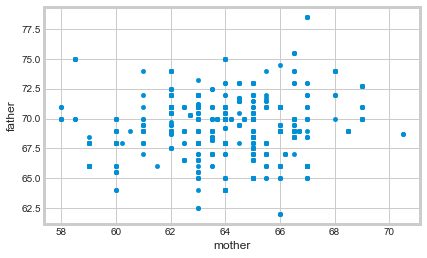

In [59]:
fhs.plot.scatter(x="mother", y="father")

In [65]:
heights = fhs[['father','mother']]
heights.head()

,father,mother
0,78.5,67.0
1,78.5,67.0
2,78.5,67.0
3,78.5,67.0
4,75.5,66.5


In [70]:
#close_to_68 = heights[(heights["mother"] >= 67) & (heights["mother"] <= 69)]
# note heights["mother"] can also be written as heights.mother
close_to_68 = heights[heights.mother == 68]
close_to_68

,father,mother
21,74.0,68.0
22,74.0,68.0
23,74.0,68.0
24,74.0,68.0
25,74.0,68.0
26,74.0,68.0
27,74.0,68.0
74,72.0,68.0
75,72.0,68.0
76,72.0,68.0


In [149]:
close_to_68.mean()

father    73.090909
mother    68.000000
dtype: float64

In [155]:
close_to_68['father'].mean()

73.090909090909093

In [71]:
def predict_child(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    close_points = heights[(heights["mother"] >= parent-0.5) & (heights["mother"] <= parent+0.5)]
    return close_points['father'].mean()   

In [72]:
predict_child(68)

71.14285714285714

In [73]:
predict_child(58)

72.0

In [74]:
#heights_and_predict = pd.DataFrame[{'father': heights['father'], 'mother': heights['mother']}]
x=heights['father']
y=heights['mother']
z = predict_child(x)
z
#plt.scatter(x, y)
#plt.scatter(x,predict_child(x))


65.65

In [75]:
x.head()

0    78.5
1    78.5
2    78.5
3    78.5
4    75.5
Name: father, dtype: float64

## Linear regression

We can compute the least-squares slope and intercept quasi-manually by (1) computing the standard deviations, (2) converting to standard units, (3) computing the correlation and (4) using the derived formulas

In [76]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of ther regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

## Regression

Or we can use libraries designed for this purpose. For our statistical analysis, we will be using a Python library called statsmodels. It provides functions and classes for estimation, analysis and creation of numerous different statistical models. Using this model, we can also conduct important statistical tests.

In the following cell, we will be creating our linear regression model and printing a summary of it. The library is imported as smf, and we use the ols function (ordinary least squares) to develop the model. We then fit it to the data using the fit function. We input a formula in the form of 'y-axis ~ x-axis' and pass in our desired Dataframe. The formula should mirror our regression:

$$FEMALE_i= \alpha + \beta MIDPARENTHEIGHT + \epsilon_i$$

Note that 'model' is an object that manages all the information related to the linear model.  We can get this information into and out of it in various ways.  

In [80]:
model = smf.ols(formula='height ~ midparentHeight', data=fhs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     107.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.82e-24
Time:                        13:26:22   Log-Likelihood:                -2368.9
No. Observations:                 898   AIC:                             4742.
Df Residuals:                     896   BIC:                             4751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.1488      4.308      5.142      0.000      13.695      30.603
midparentHeight     0.6693      0.065     10.360      0.000       0.542       0.796
==============================================================================
Omnibus:                       45.485   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.823
Skew:                           0.062   Prob(JB):                     8.18e-05
Kurtosis:                       2.302   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can get back the parameters from the params attribute:

In [81]:
p = model.params
p

Intercept          22.148809
midparentHeight     0.669259
dtype: float64

Let's plot our best fit line on our scatter plot! First, we need to create our x-axis, which we'll do by getting a range from the min to the max of midparentheight:

In [82]:
minX = min(fhs['midparentHeight'])
maxX = max(fhs['midparentHeight'])
x = np.arange(minX, maxX)
x

array([62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72.])

In the cell below, we'll first scatter the two variables as we have before. Then we'll plot a line with our x-axis x points, our y-axis points from the regression, with a color of red. Then we'll add in our xlabel and ylabel:

Text(0, 0.5, "Son's Height")

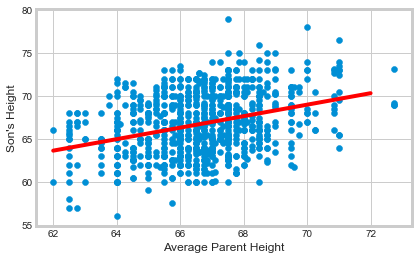

In [84]:
plt.scatter(fhs['midparentHeight'], fhs['height'])  # creating the old scatter plot
plt.plot(x, p['Intercept'] + p['midparentHeight']*x, color = 'r')  # plotting 'line' variable on the x-range
plt.xlabel("Average Parent Height")
plt.ylabel("Son's Height")

In [85]:
fhs['father'].head()

0    78.5
1    78.5
2    78.5
3    78.5
4    75.5
Name: father, dtype: float64

In [86]:
fhs['mother'].head()

0    67.0
1    67.0
2    67.0
3    67.0
4    66.5
Name: mother, dtype: float64

## comparing distributions

from https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

In [87]:
from scipy import stats

In [88]:
## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

In [60]:
#PLOT

In [89]:
## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
print(a.mean(), b.mean())
print(var_a, var_b)

1.8475503042383736 -0.13023700592160464
0.2168437957542083 0.6167817830392509


In [90]:
#std deviation
s = np.sqrt((var_a + var_b)/2)
s

0.6456104006262056

In [91]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

In [92]:
## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

In [93]:
#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
print("t = " + str(t))
print("p = " + str(2*p))
#Note that we multiply the p value by 2 because its a twp tail t-test
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


t = 6.850055182296675
p = 2.0731563217246674e-06


In [94]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 6.850055182296675
p = 4.146312643710411e-06


## linear regression with scipy.stats

In [95]:
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12345678)
x = np.random.random(10)
y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [96]:
print("r-squared:", r_value**2)

r-squared: 0.08040226853902833


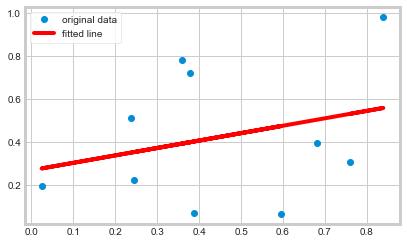

In [97]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

# now try it with height data

In [98]:
fhs.head()

,family,father,mother,gender,height,kids,male,female,midparentHeight
0,1,78.5,67.0,M,73.2,4,1.0,0.0,72.75
1,1,78.5,67.0,F,69.2,4,0.0,1.0,72.75
2,1,78.5,67.0,F,69.0,4,0.0,1.0,72.75
3,1,78.5,67.0,F,69.0,4,0.0,1.0,72.75
4,2,75.5,66.5,M,73.5,4,1.0,0.0,71.00


In [99]:
slope, intercept, r_value, p_value, std_err = stats.linregress(fhs['father'],fhs['height'])

In [100]:
print(slope, intercept, r_value, p_value, std_err)

0.3993812658985667 39.1103868370753 0.2753548262521483 4.3545879582076175e-17 0.04658211556373602
